<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#FFBF00;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predicting Insurance Charges." </div>

- [1. Load the dataset](#1)

- [2.Descrptive Statistics](#2)
    - [2.1 Exploring the dataset](#1.1)
    - [2.2 Data Cleaning](#1.3)
        - [2.3 Missing Value](#1.3.1)
        - [2.3.2 Duplicated](#1.3.2)
        - [2.3.3 Outliter](#1.3.3)
     
    - [2.3 Diagnostics Analytics](#2.3)

### 1. Import Libary and Laod the dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G6/main/Dataset/5.%20insurance.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
sns.boxplot(data = df)

### 2. Descriptive Statistics

<a id='basic_data_exploration'></a>
#### 2.1. Basic Data Exploration or Quick Exploration
```python
- df.head() # Displays the first 5 rows of the DataFrame.
- df.shape # show the numbers of rows and columns of dataset
- df.iloc[[rows], [columns]] # df.iloc[[0, 1], [2, 3]]  # Selects rows 0 and 1, columns 2 and 3
- df.loc[[rows], [columns]] # df.loc[[0, 1], ['column1', 'column2']]  # Selects rows 0 and 1, columns 'column1' and 'column2'
- df.dtypes # Returns the data types of each column.
- df.info() # Provides a concise summary of the DataFrame, including the number of non-null entries and data types.
- df.describe() # Generates descriptive statistics for numeric columns, such as count, mean, and standard deviation.
```

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.shape

(1338, 7)

<a id= 'data_cleaning'><a/>
#### 2.1. Data Cleaning
```python
- df.isnull().sum() # Displays the number of missing (null) values in each column
- df[column].isnull() # Returns a boolean series indicating whether each value in the specified column is missing.
- df.dropna(inplace = True) | dataset = df.dropna() # Removes all rows with missing values. Using inplace=True modifies the DataFrame directly, while assigning to a new variable keeps the original DataFrame unchanged.
- df.duplicated().sum() # Returns the number of duplicate rows in the DataFrame.
```

### Duplicated

In [18]:
df.duplicated().sum()

1

In [22]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [28]:
df.drop_duplicates(inplace=True)

In [30]:
# df.drop(index=581)

### Outlier

<Axes: >

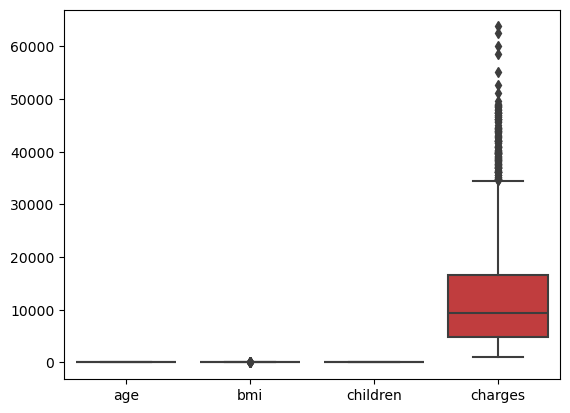

In [33]:
sns.boxplot(df)

In [41]:
def outlier_detection(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outliers = df[(df > upper_end) | (df < lower_end)]
    return outliers


In [51]:
df.loc[outlier_detection(df['bmi']).index]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [45]:
outlier_detection(df['bmi']).index

Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64')

In [39]:
df['bmi'].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

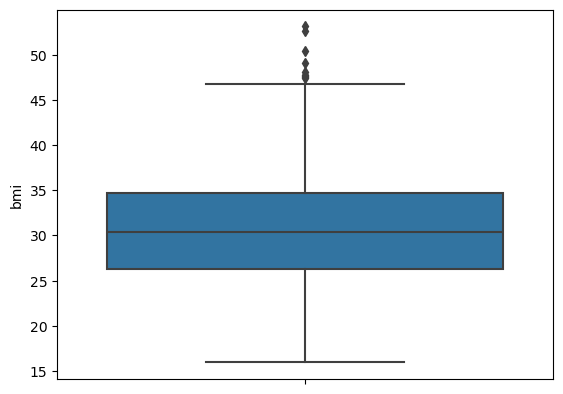

In [37]:
sns.boxplot(y = df['bmi']);

In [61]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [65]:
df.loc[outlier_detection(df['charges']).index]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [57]:
outlier_detection(df['charges']).index

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

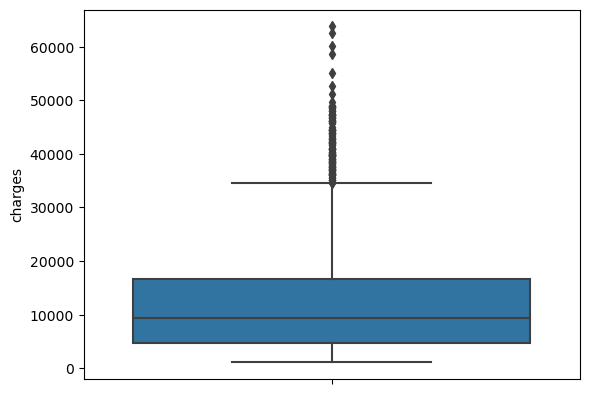

In [55]:
sns.boxplot(y = df['charges']);

 ### Diagnostics Analytics

In [84]:
df.head()

In [86]:
df['charges']

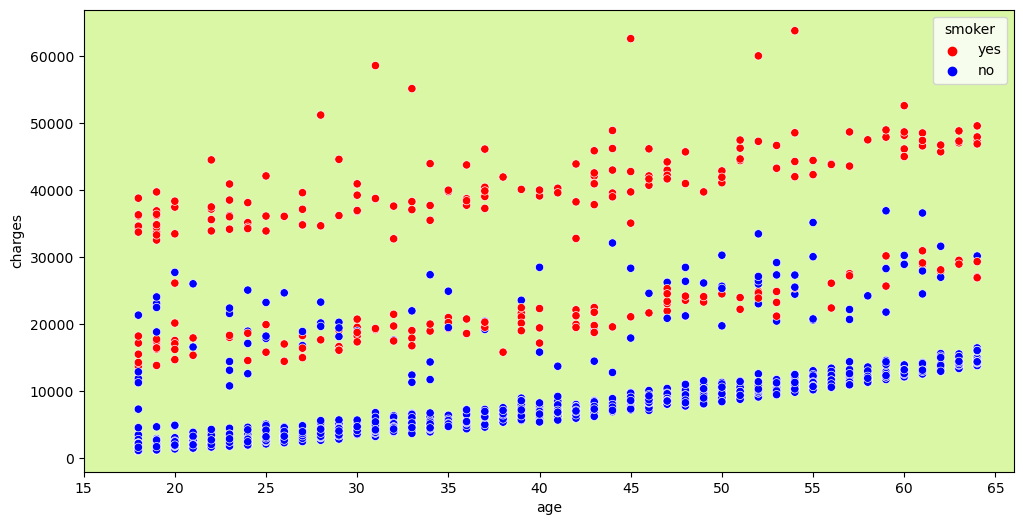

In [134]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.scatterplot(x= df['age'], 
                y = df['charges'],
                hue = df['smoker'],
                palette=['r', 'b'])
ax.set_facecolor("#DAF7A6")
ax.set_xlim(17, 66)
ax.set_xticks(np.arange(15, 66, 5));

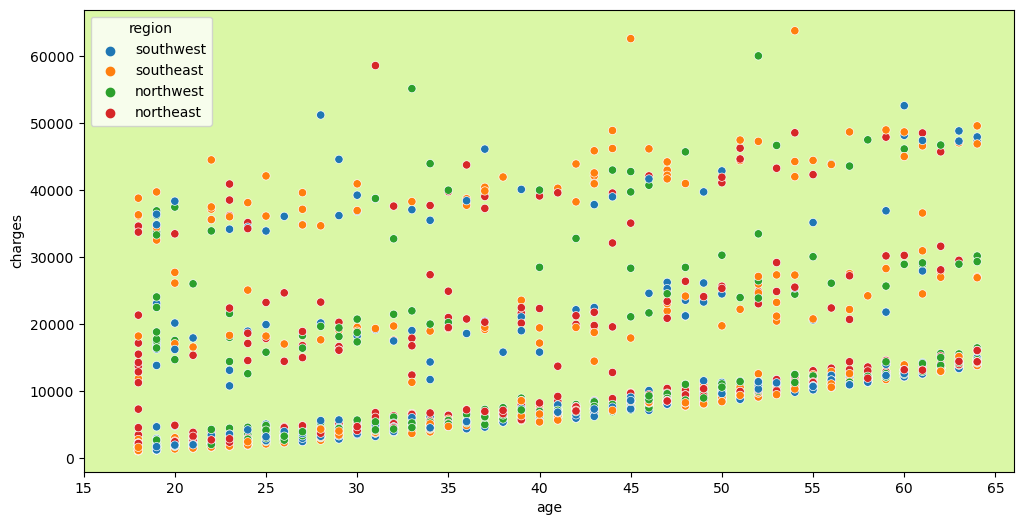

In [140]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.scatterplot(x= df['age'], 
                y = df['charges'],
                hue = df['region'])
ax.set_facecolor("#DAF7A6")
ax.set_xlim(17, 66)
ax.set_xticks(np.arange(15, 66, 5));

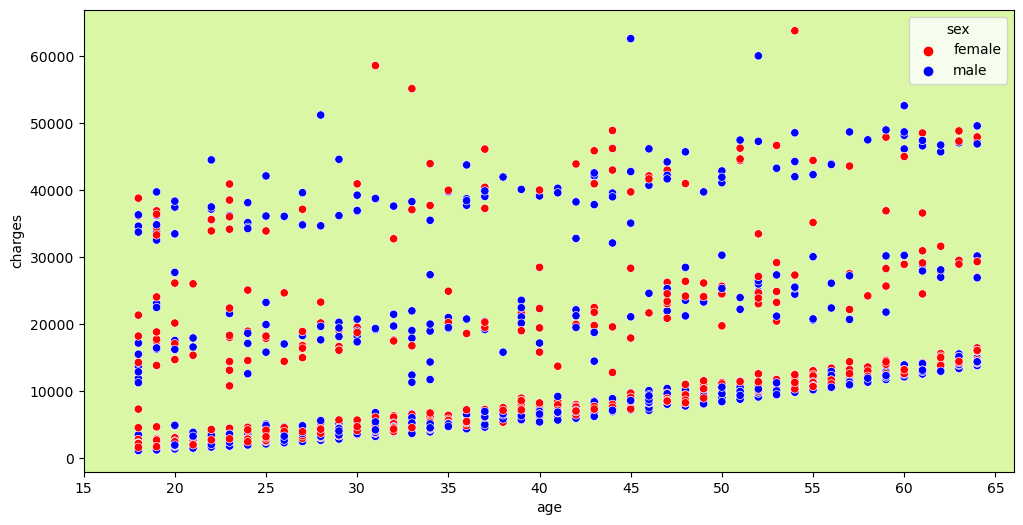

In [136]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.scatterplot(x= df['age'], 
                y = df['charges'],
                hue = df['sex'],
                palette=['r', 'b'])
ax.set_facecolor("#DAF7A6")
ax.set_xlim(17, 66)
ax.set_xticks(np.arange(15, 66, 5));

In [196]:
# fig, ax = plt.subplots(1, 2, figsize = (12, 4))
# sns.histplot(x = df[df['smoker']=='no']['charges'],
#              bins = 20, ax = ax[0],
#             hue = df[df['smoker']=='no']['sex'])
# sns.histplot(x = df[df['smoker']=='yes']['charges'],
#              bins = 20, ax = ax[1], hue = df[df['smoker']=='yes']['sex']);


In [198]:
sns.histplot(x = df['charges'], hue = df['smoker']);

In [192]:
# fig, ax = plt.subplots(figsize = (12, 4))
# sns.histplot(df[df['smoker']=='no']['charges'], bins = 20, hue = df[df['smoker']=='no']['smoker'])
# sns.histplot(df[df['smoker']=='yes']['charges'], bins = 20);

In [144]:
df.groupby(df['smoker'])['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1063.0,8440.660307,5992.973800,1121.8739,3988.883500,7345.72660,11363.019100,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [200]:
# df[['smoker', 'charges']]

In [194]:
df.groupby(df['region'])['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.364100,58571.07448
northwest,324.0,12450.840844,11073.125699,1621.3402,4733.635288,8976.977250,14788.747863,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.286900,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.520000,52590.82939
